## Student Performance Prediction Model

## Table of Contents
1. [Introduction](#introduction)
2. [Dataset Overview](#dataset-overview)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Model Architecture](#model-architecture)
7. [Training Process](#training-process)
8. [Results and Evaluation](#results-and-evaluation)
9. [Prediction Example](#prediction-example)
10. [Conclusion](#conclusion)


## Introduction


This project predicts student academic performance based on their study habits, attendance, and lifestyle factors. It combines two datasets (`student_study_habits.csv` and `Student_performance_data_.csv`), processes the data, trains an XGBoost classification model, and generates insights to identify students at risk of failing.

### Objectives
- Analyze factors influencing student success
- Build a classification model to predict performance
- Visualize correlations between student habits and grades
- Provide personalized improvement suggestions

## 2. Dataset Overview



### Libraries Used

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay,roc_curve, auc, precision_score, recall_score, f1_score
import xgboost as xgb
import joblib

### Data Loading & Preprocessing

In [3]:
data1 = pd.read_csv('/content/student_study_habits.csv')
data1.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


### Dataset 1 Information

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

In [5]:
data1.describe(include='all')

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Loading Dataset 2: Student Performance Data

In [6]:
data2 = pd.read_csv('/content/Student_performance_data _.csv')
data2.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Dropping Redundant Features

In [ ]:
data1.drop([
    'participation_level_Medium',
    'internet_access_Yes',
    'parental_education_High School',
    "parental_education_Master's",
    'parental_education_PhD',
    'extracurricular_Yes',
    'part_time_job_Yes'
], axis=1, inplace=True, errors='ignore')

data2.drop(['ParentalSupport','ParentalEducation','Extracurricular', 'Sports','Music',
            'Ethnicity', 'GPA', 'Volunteering','GradeClass'],
           axis=1, inplace=True, errors='ignore')

In [8]:
data2.head()

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring
0,1001,17,1,19.833723,7,1
1,1002,18,0,15.408756,0,0
2,1003,15,0,4.210570,26,0
3,1004,17,1,10.028829,14,0
4,1005,17,1,4.672495,17,1


In [ ]:
data1.rename(columns= {'participation_level_Low' : 'participation_level'}, inplace = True)


In [10]:
data1.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0


### Merging Datasets

The Two datasets were merged to create a comprehensive view of student behaviors and performance.

In [11]:
data = pd.concat([data1, data2], axis=1)
print(data.head())


   study_hours_per_week  sleep_hours_per_day  attendance_percentage  \
0              0.527230             0.685236               0.993245   
1              0.421400             0.881883               0.883478   
2              0.552393             0.220286               0.683469   
3              0.698283             0.612594               0.520094   
4              0.405419             0.369871               0.831127   

   assignments_completed  final_grade  participation_level  StudentID  Age  \
0               0.222222    71.104897                  0.0       1001   17   
1               0.555556    62.240021                  0.0       1002   18   
2               1.000000    65.268855                  0.0       1003   15   
3               0.222222    66.609921                  1.0       1004   17   
4               0.333333    58.967484                  0.0       1005   17   

   Gender  StudyTimeWeekly  Absences  Tutoring  
0       1        19.833723         7         1  
1     

In [12]:
data.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1001,17,1,19.833723,7,1
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1002,18,0,15.408756,0,0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1003,15,0,4.210570,26,0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,1004,17,1,10.028829,14,0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1005,17,1,4.672495,17,1


## 4. Exploratory Data Analysis

/tmp/ipython-input-3559203784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performance', data=data, palette='viridis')


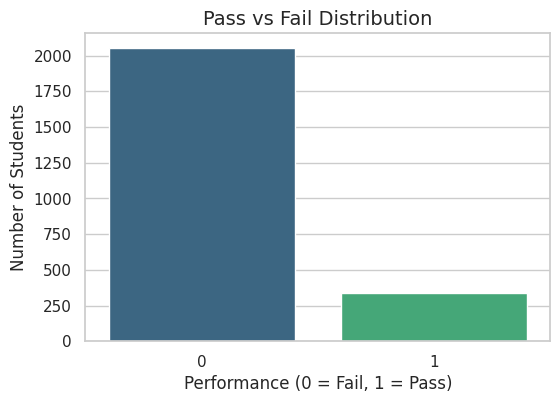

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='performance', data=data, palette='viridis')
plt.title("Pass vs Fail Distribution", fontsize=14)
plt.xlabel("Performance (0 = Fail, 1 = Pass)")
plt.ylabel("Number of Students")
plt.show()

### Correlation Heatmap

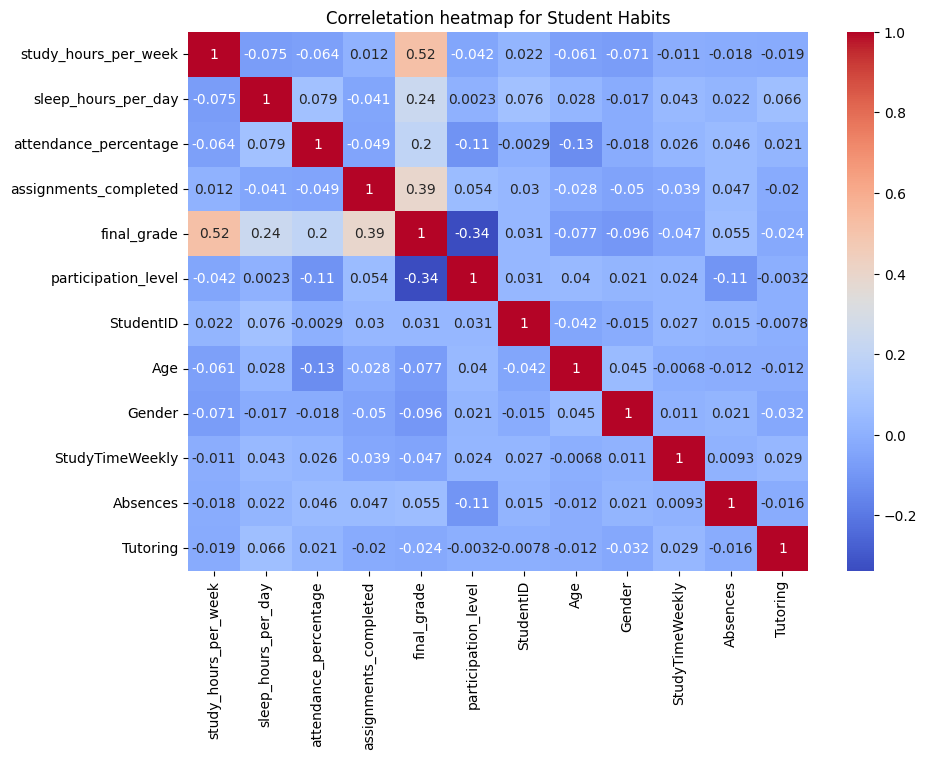

In [13]:
plt.figure(figsize= (10,7))
corr = data.corr()
sns.heatmap(corr,annot= True, cmap= 'coolwarm')
plt.title("Correletation heatmap for Student Habits")
plt.show()

**Key Insights:**
- `study_hours_per_week` and `attendance_percentage` show positive correlation with `final_grade`
- High `absences` correlate negatively with `final_grade`
- `assignments_completed` has a moderate positive relationship with performance


## 5. Feature Engineering

### Distribution of Final Grades


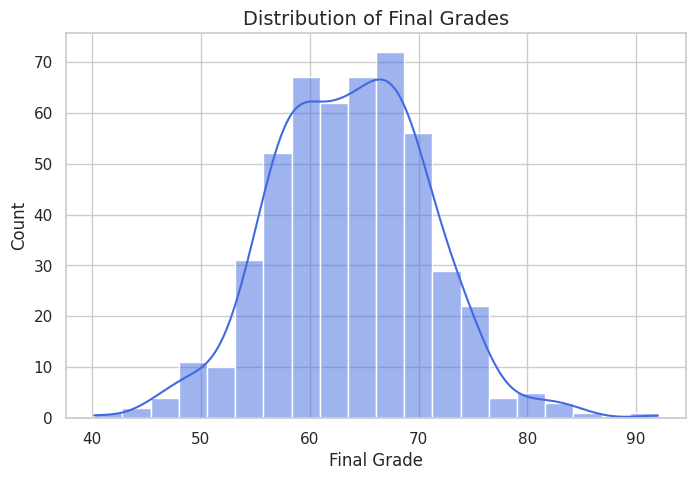

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(data['final_grade'], kde=True, color='royalblue', bins=20)
plt.title("Distribution of Final Grades", fontsize=14)
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()

### Creating Binary Target Variable

In [ ]:
# Create performance column: 1 = Pass (≥60), 0 = Fail (<60)
data["performance"] = (data['final_grade'] >= 60).astype(int)

## 6. Model Architecture

### Preparing Features and Target

The dataset was split into (80:20) ratio 80% for training and 20% for testing the model

In [ ]:

# Split into features and target
X = data.drop(columns=['StudentID', 'performance', 'final_grade'])
y = data['performance']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## 7. Training Process

### Building the Pipeline

An **XGBoost Classifier** is implemented inside a **Pipeline** to ensure consistent preprocessing, scaling, and efficient model fitting.

In [16]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xgb.XGBClassifier(  n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"))
])

pipeline.fit(X_train, y_train)
print("Accuracy:", pipeline.score(X_test,y_test))


Accuracy: 0.9436325678496869


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:10:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 8. Results and Evaluation


### Making Predictions

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
### Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9436325678496869

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       411
           1       0.82      0.78      0.80        68

    accuracy                           0.94       479
   macro avg       0.89      0.88      0.88       479
weighted avg       0.94      0.94      0.94       479



**Key Metrics:**
- **Accuracy:** 94.4%
- **F1-score (weighted):** 0.94
- Strong performance on both pass (class 0) and fail (class 1) predictions

### Feature Importance

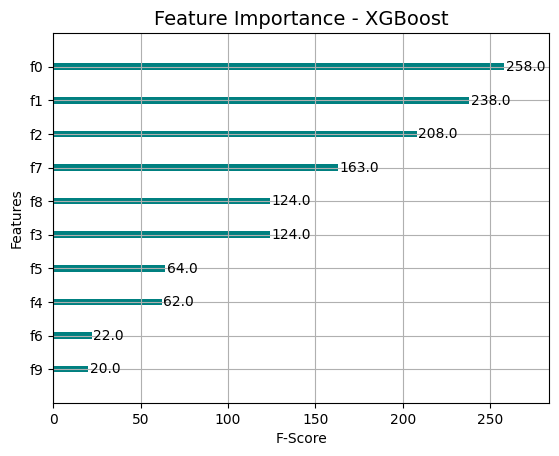

In [22]:
xgb_model = pipeline.named_steps['model']
xgb.plot_importance(xgb_model, importance_type='weight', color='teal')
plt.title("Feature Importance - XGBoost", fontsize=14)
plt.xlabel("F-Score")
plt.ylabel("Features")
plt.show()

### Confusion Matrix

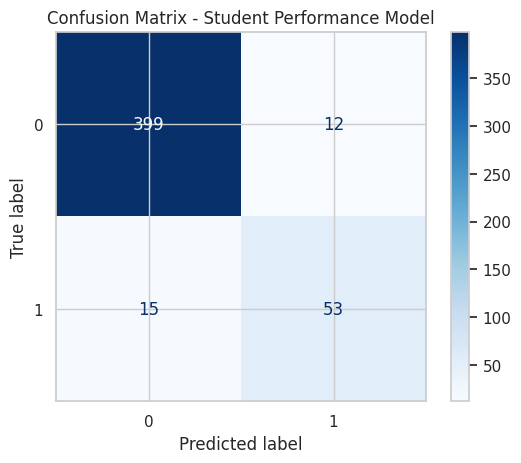

In [25]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("Confusion Matrix - Student Performance Model")
plt.show()

### ROC Curve

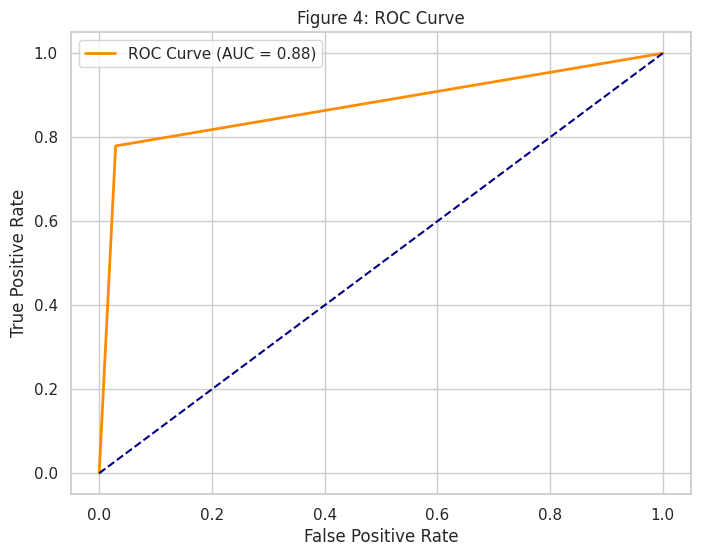

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4: ROC Curve')
plt.legend()
plt.show()

## 9. Prediction Example

In [26]:
new_student = pd.DataFrame([{
    "study_hours_per_week": 0.2,
    "sleep_hours_per_day": 0.7,
    "attendance_percentage": 0.2,
    "assignments_completed": 0.3,
    "participation_level": 0,
    "Age": 17,
    "Gender": 1,
    "StudyTimeWeekly": 15,
    "Absences": 2,
    "Tutoring": 1
}])

# Prediction
prediction = pipeline.predict(new_student)
proba = pipeline.predict_proba(new_student)[0]
confidence = proba[1]  # probability of passing



In [27]:

confidence = proba[1] * 100
fail_confidence = (1 - proba[1]) * 100


if prediction[0] == 1:
    message = f"Our model predicts you'll PASS your next exam  (Confidence: {confidence:.2f}). Keep up the good work!"
else:
    message = f"Our model predicts you might FAIL (Confidence of: {fail_confidence:.2f}%). We recommend studying harder and reviewing past topics."

    #  recommendations from the model
    reasons = []
    if new_student["study_hours_per_week"].iloc[0] < 0.4:
        reasons.append("increase your weekly study hours")
    if new_student["attendance_percentage"].iloc[0] < 0.7:
        reasons.append("improve your class attendance")
    if new_student["assignments_completed"].iloc[0] < 0.5:
        reasons.append("complete more assignments/quiz on time")
    if new_student["sleep_hours_per_day"].iloc[0] < 0.5:
        reasons.append("maintain better sleep schedule")

    if reasons:
        message += " To improve, try to " + ", ".join(reasons) + "."

print(message)


Our model predicts you might FAIL (Confidence of: 59.11%). We recommend studying harder and reviewing past topics. To improve, try to increase your weekly study hours, improve your class attendance, complete more assignments/quiz on time.


 🧩 Result Message

> **"Our model predicts you might FAIL (Confidence: 59.11%).**  
> We recommend studying harder and reviewing past topics.  
> To improve, try to increase study hours, improve attendance, and complete assignments on time."


## 10. Model Saving

### Save Trained Model

In [31]:
joblib.dump(pipeline, "student_prediction_model.pkl")
print("Model saved as 'student_prediction_model.pkl'")

Model saved as 'student_prediction_model.pkl'


### Loading the Model (for future use)

In [ ]:
loaded_pipeline = joblib.load("student_prediction_model.pkl")

# Use it for predictions
prediction = loaded_pipeline.predict(new_student)

## 11. Conclusion

### Summary
This project successfully developed a student performance prediction system with **94.4% accuracy** using XGBoost classification. The model effectively identifies at-risk students based on study habits, attendance, and other behavioral factors.

### Key Findings
1. **Study hours** and **attendance** are the strongest predictors of student success
2. **Absences** negatively impact final grades
3. **Assignment completion** shows moderate positive correlation with performance
4. The model demonstrates excellent discrimination ability (AUC = 0.88)

### Recommendations
- **For Students:** Focus on consistent attendance, adequate study time, and timely assignment completion
- **For Educators:** Use this model to identify struggling students early and provide targeted interventions
- **Future Work:** 
  - Incorporate additional features (parental involvement, mental health indicators)
  - Implement real-time monitoring dashboard
  - Develop personalized intervention strategies based on predictions